Create Clinical BMI Groups

bmi_category
Obese Class I      221
Overweight         180
Obese Class II     148
Normal             108
Obese Class III     96
Underweight          4
Name: count, dtype: int64
bmi_category
Underweight         0.000000
Normal              6.481481
Overweight         24.444444
Obese Class I      45.248869
Obese Class II     41.216216
Obese Class III    56.250000
Name: Outcome, dtype: float64


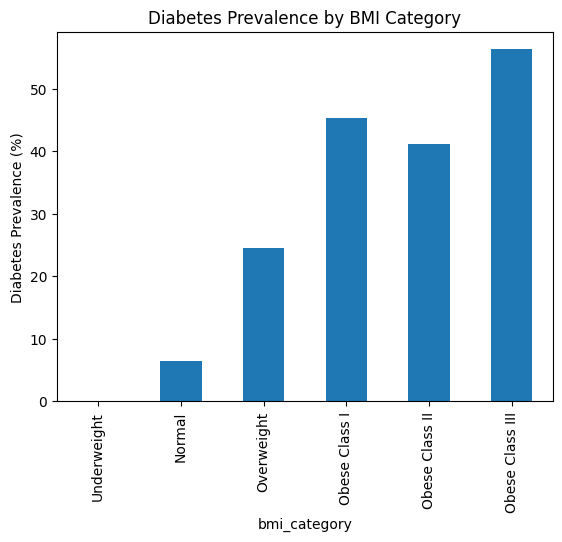

In [4]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

# Replace BMI = 0 with NaN (missing)
df.loc[df["BMI"] == 0, "BMI"] = pd.NA

# Create BMI categories using WHO cutoffs
bins = [0, 18.5, 25, 30, 35, 40, float("inf")]
labels = [
    "Underweight",
    "Normal",
    "Overweight",
    "Obese Class I",
    "Obese Class II",
    "Obese Class III"
]

df["bmi_category"] = pd.cut(df["BMI"], bins=bins, labels=labels)

# Verify counts
print(df["bmi_category"].value_counts())

# Calculate diabetes rate by BMI category (exclude missing BMI)
diabetes_rate = (
    df.dropna(subset=["BMI"])
      .groupby("bmi_category")["Outcome"]
      .mean() * 100
)

print(diabetes_rate)

import matplotlib.pyplot as plt

diabetes_rate.plot(kind="bar")
plt.ylabel("Diabetes Prevalence (%)")
plt.title("Diabetes Prevalence by BMI Category")
plt.show()

1. In each BMI category there are Underweight: 4, Normal: 108, Overweight: 180, Obese Class I: 221, Obese Class II: 148, Obese Class III: 96

2. The Diabetes rate for each BMI category is Underweight: 0.0%, Normal: 6.48%, Overweight: 24.44%, Obese Class I: 45.25%, Obese Class II: 41.22%, Obese Class III: 56.25%

3. Yes, there is a clear positive relationship. Diabetes prevalence increases substantially starting at the Overweight category and rises sharply in Obese Class I and above, with the highest risk in Obese Class III.